## **Grafická prezentácia náhodného výberu**

Predpokladajme, že máme k dispozícii náhodný výber (vzorku, namerané hodnoty náhodnej premennej) o rozsahu $n$. Jednotlivé hodnoty z tejto vzorky označme ako $x_1,x_2,\dots,x_n$.

### **Empirická distribučná funkcia**

Formálne je možné *empirickú distribučnú funkciu* definovať vzťahom

$$ F_n(x) = \frac{1}{n} \sum_{i=1}^n \chi_{(-\infty,x)}(x),$$

kde $\chi_A(x)$ je tzv. *charakteristická funkcia* množiny $A$ definovaná ako:

$$\chi_A(x) = \left\{ \begin{array}{ll}
1&\mbox{pre } x \in A\\
0&\mbox{pre } x \notin A.
\end{array}
\right.$$

Pre určenie empirickej distribučnej funkcie ponúka prostredie R funkciu `ecdf()`. Empirickú distribučnú funkciu potom môžeme vizualizovať pomocou príkazu `plot()`.

In [2]:
# Načítanie potrebných knižníc
library(repr)
library(extrafont)
# font_import()

Registering fonts with R


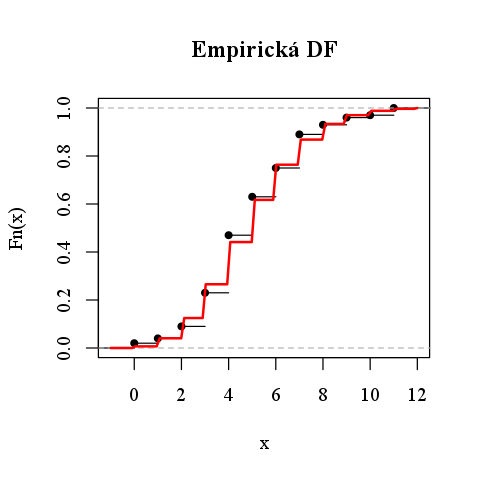

In [3]:
x<-rpois(100,5)
graf<-ecdf(x)
options(repr.plot.width=4,repr.plot.height=4)
plot(graf,main="Empirická DF",family="Times New Roman",cex=0.75)
par(new=TRUE)
curve(ppois(x,5),col="red",add="T",ylab="",xlab="",lwd=2,axes=FALSE)

In [ ]:
x<-rnorm(100,5,2)
plot.ecdf(x,main="Empirická DF",family="Times New Roman",pch=1,cex=0.5)
par(new=TRUE)
curve(pnorm(x,5,2),col="red",add="T",ylab="",xlab="",lwd=3,axes=FALSE)

### **Stĺpcový graf**

Stĺpcové grafy zobrazujú veľkosť alebo početnosť skúmaného javu pomocou obdĺžnikov zodpovedajúcej výšky. Stĺpce je možné zobrazovať vertikálne na osi $x$ (stojace obdĺžniky) alebo horizontálne na osi $y$ (ležiace obdĺžniky). V prostredí R je k dispozícii funkcia `barplot()`. Údaje sú zadávané ako tabuľka.

Zo zdroja

http://statdat.statistics.sk/cognosext/cgi-bin/cognos.cgi?b_action=cognosViewer&ui.action=run&ui.object=storeID%28%22iFE32FBCAEB0F4E00A94321FB61D9FC04%22%29&ui.name=Hrub%C3%A1%20mzda%20a%20popisn%C3%A9%20%C5%A1tatistick%C3%A9%20charakteristiky%20[np1103rr]&run.outputFormat=&run.prompt=true&cv.header=false&ui.backURL=%2fcognosext%2fcps4%2fportlets%2fcommon%2fclose.html

získajte údaje o priemernej hrubej mzde v regiónoch Slovenska a výsledky zobrazte v podobe stĺpcového grafu.

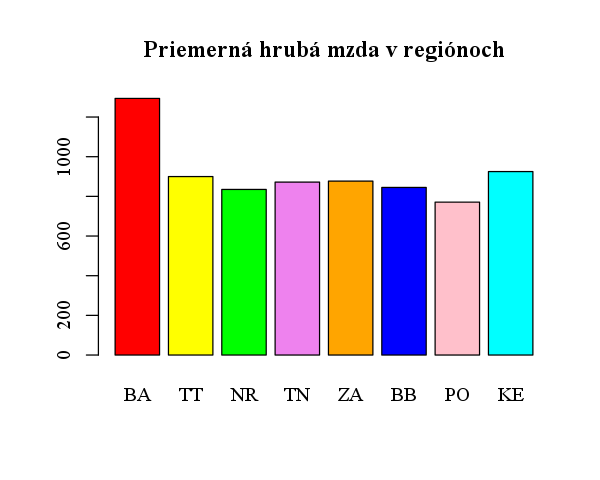

In [4]:
kraj<-c("BA","TT","NR","TN","ZA","BB","PO","KE")
options(repr.plot.width=5,repr.plot.height=4)
z<-c(1294,900,835,872,877,845,771,925)
colors = c("red", "yellow", "green", "violet","orange", "blue", "pink", "cyan") 
barplot(z,names=as.character(kraj),main="Priemerná hrubá mzda v regiónoch",family="Times New Roman",col=colors)

In [ ]:
# Je možné stĺpce zobraziť v horizontálnej polohe voľbou horiz=TRUE
options(repr.plot.width=4,repr.plot.height=5)
barplot(z,names=as.character(kraj),main="Priemerná hrubá mzda v regiónoch",family="Times New Roman",col=colors,horiz=TRUE)

### **Histogram**

Histogram je jedným z najbežnejších grafických zobrazení náhodného výberu. Má podobu stĺpcového grafu, v ktorom jednotlivé obdĺžniky predstavujú početnosti triediacich intervalov alebo sledovaných kvalitatívnych znakov. Tvoria ho obdĺžniky, ktorých výška je priamo úmerná početnostiam jednotlivých znakov.

V prostredí R nám na zobrazenie histogramov slúži funkcia `hist()`

In [ ]:
hist(x,main="Histogram početností",family="Times New Roman")
par(new=TRUE)
curve(dnorm(x,5,2),col="red",add="T",axes=FALSE,ylab="",xlab="",lwd=2)

### **Boxplot**

*Boxploty*, nazývané tiež *krabicové grafy* predstavujú grafickú vizualizáciu dát založenú na kvartiloch. Ich stredná časť - *box* - je vždy jednotný a je zhora ohraničená 3.kvartilom, zdola je ohraničený 1.kvartilom a medzi nimi leží línia, ktorá vyznačuje medián. Obsahujú tiež línie tzv. *whiskery*, ktoré vychádzajú z boxov kolmo nahor a nadol a vyznačujú variabilitu dát. Odľahlé hodnoty tzv. *outliers* bývajú niekedy vyznačené samostatne.

Na rozdiel od boxov, ktoré majú vždy jednotný význam, whiskery môžu reprezentovať rôzne hodnoty napr.

* maximálnu a minimálnu hodnotu
* najnižší údaj 1,5 IQR dolného kvartilu a najvyšší údaj 1,5 IQR horného kvartilu
* štandardnú odchýlku nad a pod strednú hodnotu údajov
* 9. a 91. percentil
* 2. a 98. percentil

V prostredí R je k dispozícii funkcia `boxplot()`. Pre whiskery je implicitne nastavená hodnota 1.5-násobku medzikvartilového rozpätia.

In [ ]:
x<-rnorm(500,20,30)
options(repr.plot.width=3,repr.plot.height=4)
boxplot(x)

In [ ]:
# Rozsah whiskerov zmeníme pomocou parametra range, napr. range=0 pre maximálnu a minimálnu hodnotu
# Inak kladná hodnota range udáva násobok IQR, implicitne je 1.5
boxplot(x,range=0)

In [ ]:
# Viacero boxplotov v jednom obrázku
y<-rnorm(400,50,20)
z<-rnorm(500,10,30)
options(repr.plot.width=4,repr.plot.height=4)
boxplot(x,y,z)

### **Kvantil-kvantilový graf (Q-Q plot)**

Slúži na grafické posúdenie, či náhodný výber pochádza z nejakého známeho rozdelenia. Konštruuje sa tak, že na zvislú os sa nanášajú usporiadané hodnoty náhodného výberu a na vodorovnú os kvantily predpokladaného teoretického rozdelenia. Pokiaľ toto rozdelenie závisí od parametrov, je potrebné ich odhadnúť. Získanými bodmi sa metódou najmenších štvorcov preloží priamka. Čím menej sa body odchyľujú od tejto priamky, tým lepší je súlad medzi teoretickým a empirickým rozdelením.

V prostredí R máme k dispozícii funkciu `qqnorm()` pre porovnanie s kvantilmi normálneho rozdelenia. Priamku pre posúdenie adekvátnosti teoretického rozdelenia získame pomocou funkcie `qqline()`.

In [ ]:
qqnorm(x,family="Times New Roman")
qqline(x,col="red",lwd=2)

Pre iné ako normálne rozdelenia použijeme funkciu `qqplot()`, kde ako argument vstupujú dva náhodné výbery (nemusia byť nutne s rovnakým rozsahom). Táto funkcia umožňuje graficky posúdiť aj to, či dva náhodné výbery pochádzajú z toho istého rozdelenia, bez toho, že by sme o tomto rozdelení robili nejaké predpoklady.

Ak obidva náhodné výbery pochádzajú z toho istého rozdelenia, musia body grafu ležať v blízkosti priamky  $y=x$, ktorú do grafu doplníme pomocou funkcie `abline(0,1)`.

In [ ]:
y<-rexp(300,10)
qqplot(rexp(200,10),y,family="Times New Roman",main="Q-Q plot pre exponenciálne rozdelenie")
abline(0,1,col="red",lwd=2)

In [ ]:
x<-rgamma(200,10,5)
y<-rgamma(300,10,5)
qqplot(x,y,family="Times New Roman",main="Q-Q plot pre gama rozdelenie")
abline(0,1,col="red",lwd=2)

In [ ]:
x<-rgamma(200,10,5)
y<-rnorm(300,10,5)
qqplot(x,y,family="Times New Roman",main="Q-Q plot pre gama a normálne rozdelenie")
abline(0,1,col="red",lwd=2)